In [2]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [3]:
#constants
m_s = 50.0    #weight of rocket shell in [kg]
g = 9.81    #grav accel in [m/s^2]
rho = 1.091    #density of air [kg/m^3]
r = 0.5    #radius of rocket x-sect [m]
A = math.pi*r**2    #max x-sect area of rocket
v_e = 325.0    #exhaust speed [m/s]
C_D = 0.15    #drag coeff
m_po = 100.0    #initial weight of rocket propellant at t=0, [kg]
v0 = 0
h0 = 0

T = 100
dt = 0.1
N = int(T/dt)+1
t= numpy.linspace(0.0, T, N)



#below goes into for loop for calculating values, before initiating Euler
#if t<= 5:
#    m_p_dot = 100
#else:
#    m_p_dot = 0
#m_p = m_po - m_p_dot


In [35]:
#functions

#def m_p(m_po,t):
    
    #for i, time in enumerate(t):
        
        #below goes into for loop for calculating values, before initiating Euler
        #if time[i]<=5:
            #m_p_dot = 100
        #else:
            #m_p_dot = 0
        
        #return m_po - m_p_dot

#for i,timez in enumerate(t):    ##added below
    #mass_prop = m_p(m_po, timez)


def f(u):
    v = u[0]
    h = u[1]
    return numpy.array([-g+m_p_dot*v_e/(m_s+m_p)-rho*A*C_D*v*abs(v)\
                        /(2*(m_s+m_p)),\
                       v])

def euler(u,f,dt):
    return u +dt*f(u)


In [125]:
u = numpy.empty((N,2))
u[0] = numpy.array([v0,h0])
massprop = numpy.empty_like(t)

#for i,timez in enumerate(t):
    #mass_prop = m_p(m_po, timez)   
        
for n in range(N-1):
    if t[n]<=5:
        m_p_dot = 20*t[n]
        m_p = m_po - m_p_dot
    
    else:
        m_p_dot = 0
        m_p = 0
    
    massprop[n] = m_p#m_p = m_po - m_p_dot
   
    #print(m_p)
    u[n+1] = euler(u[n], f, dt)
    
    #for i, time in enumerate(t):
       
        #if time<=5:
            #m_p_dot = 100
            #mass_prop = m_po - m_p_dot
        #else:
           # m_p_dot = 0
            #mass_prop = m_po - m_p_dot
        #for n in range(N-1):
            #u[n+1] = euler(u[n], f, dt)
    

v = u[:,0]
h = u[:,1]

#positive values for height
idx_negative_height = numpy.where(h<0.0)[0]
if len(idx_negative_height)==0:
    idx_ground_height = N-1
    print('Euler integration has not touched ground yet')
else: idx_ground_height = idx_negative_height[0]

#positive values for velocity
idx_negative_velocity = numpy.where(v<0.0)[0]
if len(idx_negative_velocity)==0:
    idx_ground_velocity = N-1
    print('Euler integration has not touched ground yet')
else: idx_ground_velocity = idx_negative_velocity[0]

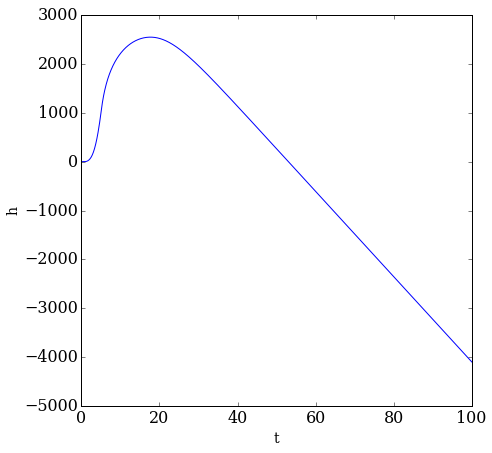

In [126]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel('t', fontsize =14)
pyplot.ylabel('h', fontsize =14)
#pyplot.plot(t[:idx_ground_height],h[:idx_ground_height]);
pyplot.plot(t,h);

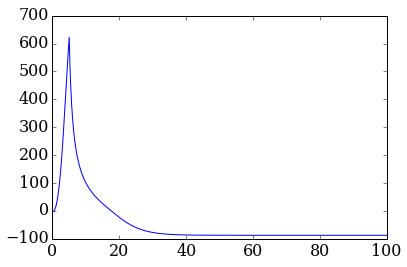

In [127]:
#pyplot.plot(t[:idx_ground_velocity],v[:idx_ground_velocity])
pyplot.plot(t,v)

In [128]:
hmax = h.max()
vmax = v.max()
print ('Max height is {:.3f} m'.format(hmax))
print('Max velocity is {:.3f} m/s'.format(vmax))


Max height is 2550.593 m
Max velocity is 622.425 m/s


In [129]:
print(t[10])

1.0


In [131]:
print (massprop[32])

36.0


In [151]:
p = numpy.log((1.6-1.5)/(1.5-1.475))/numpy.log(2)
print(p)

2.0


In [144]:
p = numpy.linspace(4,23,43)
print(p[5])

6.2619047619


In [148]:
ones_array = numpy.ones((5,17))
zeros_array = numpy.zeros(ones_array.shape)
print (zeros_array.shape)

(5, 17)


In [150]:
p = 7
r = numpy.array([11.2,4.7,6.6])
answer = (numpy.sin(p/r))**3
print(answer)

[ 0.20030151  0.99009101  0.66454238]


In [155]:
type h

SyntaxError: invalid syntax (<ipython-input-155-6f6e089d0d06>, line 1)